# AI and Intrusion Detection

|***FEATURE***                          |***DESCRIPTION***                                              |
|---------------------------------------|---------------------------------------------------------------|
| Source_Port                           | Source port.                                                  |
| Destination_Port                      | Destination port.                                             |
| Protocol                              | Protocol.                                                     |
| Flow_Duration                         | Flow duration.                                                |
| Total_Forward_Packets                 | Number of the total packets in forward direction.             |
| Total_Backward_Packets                | Number of the total packets in backward direction.            |
| Total_Length_Forward_Packets          | Total size of packets in forward direction.                   |
| Total_Length_Backward_Packets         | Total size of packets in backward direction.                  |
| Forward_Packets_Length_Max            | Maximum size of packets in forward direction.                 |
| Forward_Packets_Length_Min            | Minimum size of packets in forward direction.                 |
| Forward_Packets_Length_Mean           | Mean size of packets in forward direction.                    |
| Backward_Packets_Length_Max           | Maximum size of packets in backward direction.                |
| Backward_Packets_Length_Min           | Minimum size of packets in forward direction.                 |
| Backward_Packets_Length_Mean          | Mean size of packets in backward direction.                   |
| Packets_Flow_IAT_Mean                 | Mean time between two flows.                                  |
| Packets_Flow_IAT_Standard_Deviation   | Standard deviation time between two flows of packets.         |
| Packets_Flow_IAT_Max                  | Maximum time between two flows of packets.                    |
| Packets_Flow_IAT_Min                  | Minimum time between two flows of packets.                    |
| Forward_IAT_Total                     | Total time between two packets sent in forward direction.     |
| Forward_IAT_Mean                      | Mean time between two packets sent in forward direction.      |
| Forward_IAT_Min                       | Minimum time between two packets sent in forward direction.   |
| Backward_IAT_Total                    | Total time between two packets sent in backward direction.    |
| Backward_IAT_Mean                     | Mean time between two packets sent in backward direction.     |
| Backward_IAT_Min                      | Minimum time between two packets sent in backward direction.  |
| Forward_Header_Length                 | Total bytes used for headers in forward direction.            |
| Backward_Header_Length                | Total bytes used for headers in backward direction.           |
| Forward_Packets_per_Second            | Number of forward packets per second.                         |
| Backward_Packets_per_Second           | Number of backward packets per second.                        |
| Packets_Length_Min                    | Minimum length of flow.                                       |
| Packets_Length_Max                    | Maximum length of flow.                                       |
| Packets_Length_Mean                   | Mean length of flow.                                          |
| Packets_Length_Standard_Deviation     | Standard deviation length of flow.                            |
| Class                                 | Normal traffic or attack (Mirai, DoS, Scan, Spoofing)         |

## Data Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [355]:
data = pd.read_csv('partial-ids-iot-dataset.csv', sep=';')

In [356]:
data.head()

,Source_Port,Destination_Port,Protocol,Flow_Duration,Total_Forward_Packets,Total_Backward_Packets,Total_Length_Forward_Packets,Total_Length_Backward_Packets,Forward_Packets_Length_Max,Forward_Packets_Length_Min,...,Backward_IAT_Min,Forward_Header_Length,Backward_Header_Length,Forward_Packets_per_Second,Backward_Packets_per_Second,Packets_Length_Min,Packets_Length_Max,Packets_Length_Mean,Packets_Length_Standard_Deviation,Class
0,52717,9020,6,98,0,2,0,2776,0,0,...,98,0,64,0.000000,20408.163265,1388,1388,1388.0,0.0,Scan
1,443,43238,6,184,1,1,1441,1441,1441,1441,...,0,32,32,5434.782609,5434.782609,1441,1441,1441.0,0.0,Mirai
2,10000,10101,17,206,2,1,2860,1430,1430,1430,...,0,16,8,9708.737864,4854.368932,1430,1430,1430.0,0.0,Mirai
3,52727,9020,6,141,0,3,0,4164,0,0,...,70,0,96,0.000000,21276.595745,1388,1388,1388.0,0.0,Scan
4,64774,9988,17,8,4,1,128,32,32,32,...,0,32,8,500000.000000,125000.000000,32,32,32.0,0.0,Mirai


In [357]:
data.shape

(9912, 33)

In [358]:
pd.DataFrame([data.dtypes, data.isna().sum()], index=['type','isna_sum']).T

,type,isna_sum
Source_Port,int64,0
Destination_Port,int64,0
Protocol,int64,0
Flow_Duration,int64,0
Total_Forward_Packets,int64,0
Total_Backward_Packets,int64,0
Total_Length_Forward_Packets,int64,0
Total_Length_Backward_Packets,int64,0
Forward_Packets_Length_Max,int64,0
Forward_Packets_Length_Min,int64,0


In [401]:
# amount of different classes in the dataset
data.Class.value_counts()

Mirai       6469
Scan        1223
DoS          982
Normal       684
Spoofing     554
Name: Class, dtype: int64

In [359]:
# share of different classes in the dataset, in percent
(data.Class.value_counts(normalize=True)*100).round(2)

Mirai       65.26
Scan        12.34
DoS          9.91
Normal       6.90
Spoofing     5.59
Name: Class, dtype: float64

In [360]:
data.Source_Port.nunique(), data.Destination_Port.nunique()

(1712, 157)

In [361]:
data.Protocol.unique()

array([ 6, 17,  0])

## Prepating data and models

In [127]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
# import shap

In [362]:
original_columns = data.columns.tolist()

In [203]:
def categorize_ports(ports_column):
    """Takes columns of with port numbers and categorizes it.
       - port numbers under 1000 stay the same, 
       - port numbers between 1000 and 9999 are 'rounded' down until hundreds, e.g. port 6980 becomes '69H',
       - port numbers from 10000 and up are rounded down until thousands, e.g. port 57875 becomes '57K';
    """
    ports = ports_column
    upto_1K = ports < 1_000
    upto_10K = ports < 10_000
    greater_than_10K = ports >= 10_000
    ports = ports_column.astype(str)
    ports[~upto_1K & upto_10K] = ports[~upto_1K & upto_10K].apply(lambda x: x[:2]+'H')
    ports[greater_than_10K] = ports[greater_than_10K].apply(lambda x: x[:2]+'K')
    return ports

In [350]:
def categorize_ports_2(ports_column):
    """Takes columns of with port numbers and categorizes it.
       - port numbers under 1000 stay the same, 
       - port numbers between 1000 and 9999 are 'rounded' down until thousands, e.g. port 6980 becomes '6K',
       - port numbers from 10000 and up are rounded down until thousands, e.g. port 57875 becomes '5L';
    """
    ports = ports_column
    upto_1K = ports < 1_000
    upto_10K = ports < 10_000
    greater_than_10K = ports >= 10_000
    ports = ports_column.astype(str)
    ports[~upto_1K & upto_10K] = ports[~upto_1K & upto_10K].apply(lambda x: x[:1]+'K')
    ports[greater_than_10K] = ports[greater_than_10K].apply(lambda x: x[:1]+'L')
    return ports

In [204]:
data['Cat_Source_Port'] = categorize_ports(data['Source_Port'])
data['Cat_Destination_Port'] = categorize_ports(data['Destination_Port'])

In [351]:
data['Cat2_Source_Port'] = categorize_ports_2(data['Source_Port'])
data['Cat2_Destination_Port'] = categorize_ports_2(data['Destination_Port'])

In [205]:
data.Cat_Source_Port.nunique(), data.Cat_Destination_Port.nunique()

(121, 52)

In [352]:
data.Cat2_Source_Port.nunique(), data.Cat2_Destination_Port.nunique()

(18, 17)

In [354]:
ohe_source_ports = pd.get_dummies(data['Cat_Source_Port'], prefix='Source_Port')
ohe_dest_ports = pd.get_dummies(data['Cat_Destination_Port'], prefix='Dest_Port')
ohe_protocols = pd.get_dummies(data['Protocol'], prefix='Protocol')

ohe_source_ports2 = pd.get_dummies(data['Cat2_Source_Port'], prefix='Source_Port2')
ohe_dest_ports2 = pd.get_dummies(data['Cat2_Destination_Port'], prefix='Dest_Port2')

In [366]:
ohe_X = pd.concat([ohe_source_ports2, ohe_dest_ports2, ohe_protocols, data[original_columns[3:-1]]], axis=1)

In [367]:
ohe_classes = pd.get_dummies(data['Class'])

In [368]:
dt = DecisionTreeClassifier(random_state=42)

In [369]:
def model_and_feature_importances(model, X, y, algo, target_name):
    model.fit(X,y)
    d_permutation_importance = permutation_importance(model, X, y,\
                                                      n_repeats=7,\
                                                      random_state=42)
    feature_importances = pd.Series(d_permutation_importance['importances_mean'],\
                                    index=model.feature_names_in_)
    fig, ax = plt.subplots(1,1, figsize=(8,6))
    feature_importances.plot.bar(yerr=d_permutation_importance['importances_std'],\
                                 ax=ax)
    ax.set_title(f"{target_name}: feature importances using {algo}.")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    return model, d_permutation_importance

In [370]:
models = {'dt':dt}

## Attack - Mirai

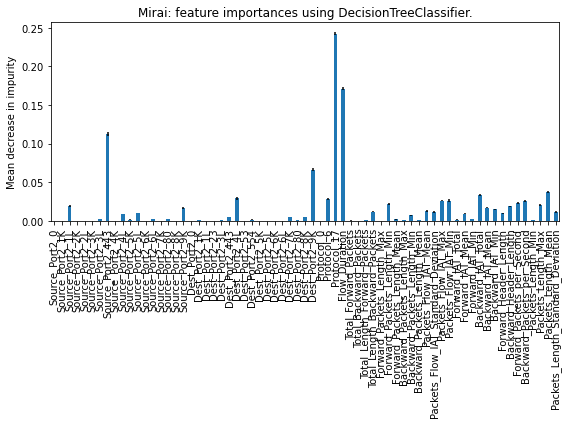

In [371]:
target_name = 'Mirai'
X = ohe_X
y = one_hot_classes[target_name]

mirai = {}
mirai['target_name'] = target_name
mirai['y'] = y


for name, algo in models.items():
    algo_name = str(algo.__class__).split('.')[-1][:-2]
    model, d_permutation_importance = model_and_feature_importances(algo, X, y,\
                                                          algo=algo_name,\
                                                          target_name=target_name)
    mirai[name] = {'model': model,\
                   'permutation_importance': d_permutation_importance}

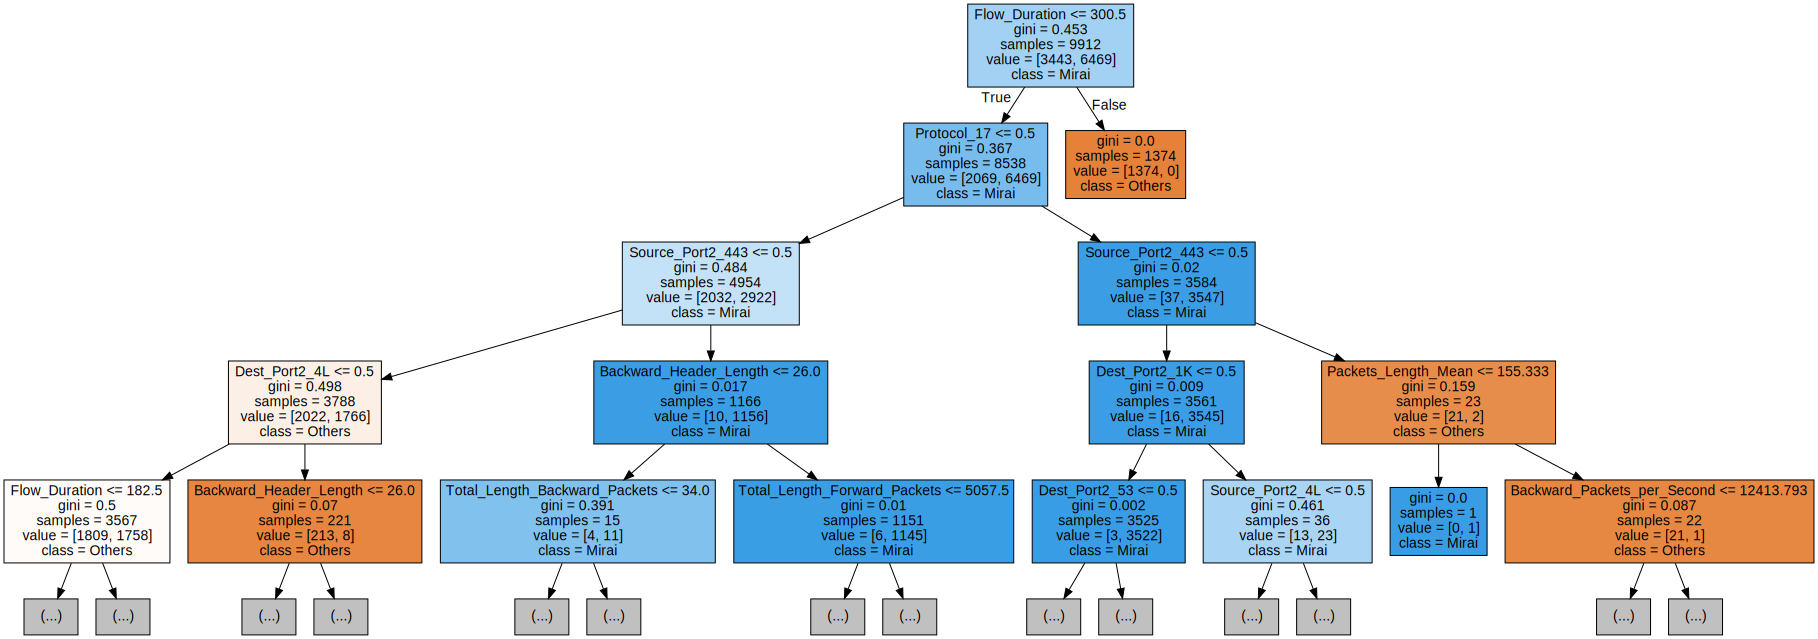

In [372]:
dtree = mirai['dt']['model']
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=X.columns.tolist(),  
                                class_names=['Others',target_name],
                                filled=True)

# Draw graph
mirai['dt']['graph'] = graphviz.Source(dot_data, format="png") 
mirai['dt']['graph']

In [373]:
d_permutation_importance = mirai['dt']['permutation_importance'] 
chosen_features = X.columns[d_permutation_importance['importances_mean'] > 0.0].tolist()
mirai['dt']['chosen_features'] = chosen_features

In [374]:
chosen_features

['Source_Port2_1L',
 'Source_Port2_3L',
 'Source_Port2_443',
 'Source_Port2_4L',
 'Source_Port2_5K',
 'Source_Port2_5L',
 'Source_Port2_6L',
 'Source_Port2_80',
 'Source_Port2_8K',
 'Source_Port2_9K',
 'Dest_Port2_1K',
 'Dest_Port2_3L',
 'Dest_Port2_443',
 'Dest_Port2_4L',
 'Dest_Port2_53',
 'Dest_Port2_554',
 'Dest_Port2_6L',
 'Dest_Port2_7K',
 'Dest_Port2_80',
 'Dest_Port2_8K',
 'Dest_Port2_9K',
 'Protocol_6',
 'Protocol_17',
 'Flow_Duration',
 'Total_Forward_Packets',
 'Total_Length_Forward_Packets',
 'Total_Length_Backward_Packets',
 'Forward_Packets_Length_Min',
 'Forward_Packets_Length_Mean',
 'Backward_Packets_Length_Max',
 'Backward_Packets_Length_Min',
 'Backward_Packets_Length_Mean',
 'Packets_Flow_IAT_Mean',
 'Packets_Flow_IAT_Standard_Deviation',
 'Packets_Flow_IAT_Max',
 'Packets_Flow_IAT_Min',
 'Forward_IAT_Total',
 'Forward_IAT_Mean',
 'Forward_IAT_Min',
 'Backward_IAT_Total',
 'Backward_IAT_Mean',
 'Backward_IAT_Min',
 'Forward_Header_Length',
 'Backward_Header_Length',

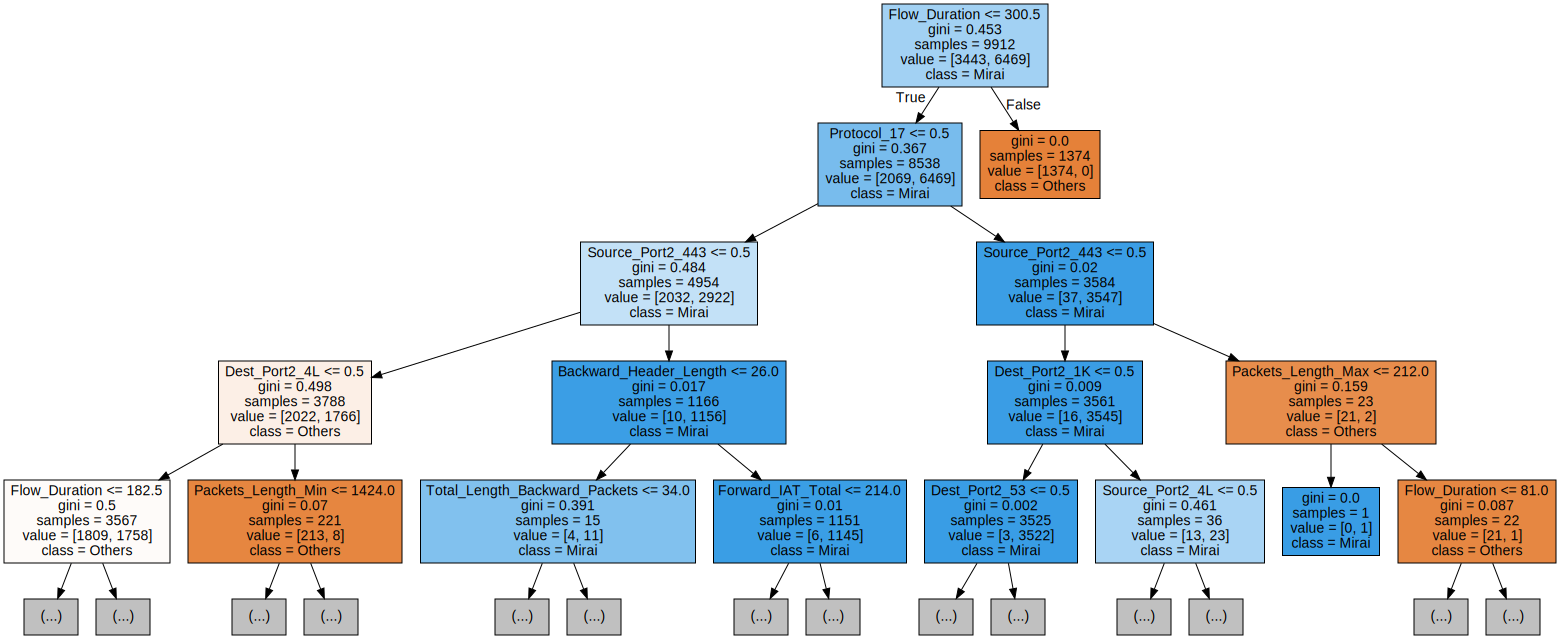

In [378]:
dtree.fit(X[chosen_features],y)
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=chosen_features,  
                                class_names=['Others',target_name],
                                filled=True)

mirai['dt']['refitted_model'] = dtree
# Draw graph
mirai['dt']['refitted_graph'] = graphviz.Source(dot_data, format="png") 
mirai['dt']['refitted_graph']

## Attack - Scan

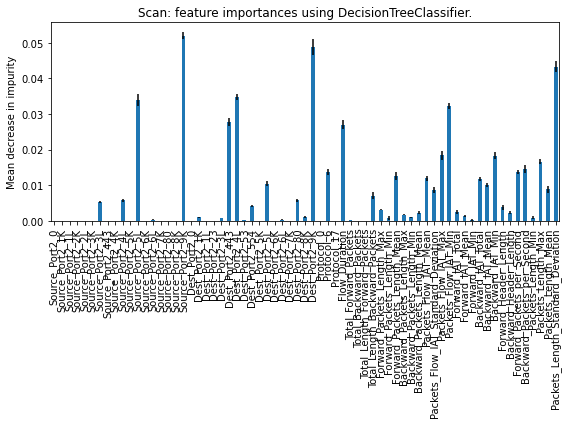

In [379]:
target_name = 'Scan'
X = ohe_X
y = one_hot_classes[target_name]

scan = {}
scan['target_name'] = target_name
scan['y'] = y


for name, algo in models.items():
    algo_name = str(algo.__class__).split('.')[-1][:-2]
    model, d_permutation_importance = model_and_feature_importances(algo, X, y,\
                                                          algo=algo_name,\
                                                          target_name=target_name)
    scan[name] = {'model': model,\
                   'permutation_importance': d_permutation_importance}

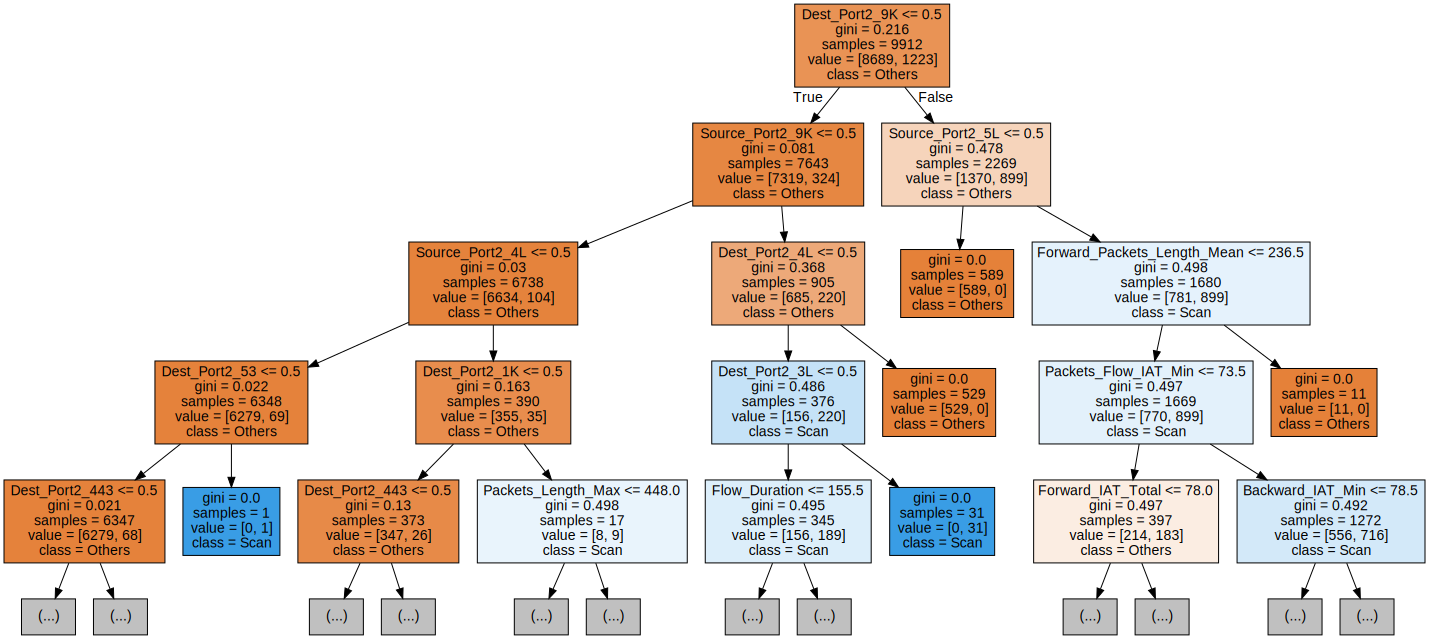

In [380]:
dtree = scan['dt']['model']
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=X.columns.tolist(),  
                                class_names=['Others',target_name],
                                filled=True)

# Draw graph
scan['dt']['graph'] = graphviz.Source(dot_data, format="png") 
scan['dt']['graph']

In [381]:
d_permutation_importance = scan['dt']['permutation_importance'] 
chosen_features = X.columns[d_permutation_importance['importances_mean'] > 0.0].tolist()
scan['dt']['chosen_features'] = chosen_features

In [382]:
chosen_features

['Source_Port2_3L',
 'Source_Port2_4L',
 'Source_Port2_5L',
 'Source_Port2_6K',
 'Source_Port2_6L',
 'Source_Port2_9K',
 'Dest_Port2_1K',
 'Dest_Port2_3L',
 'Dest_Port2_443',
 'Dest_Port2_4L',
 'Dest_Port2_53',
 'Dest_Port2_554',
 'Dest_Port2_5L',
 'Dest_Port2_6L',
 'Dest_Port2_80',
 'Dest_Port2_8K',
 'Dest_Port2_9K',
 'Protocol_6',
 'Flow_Duration',
 'Total_Forward_Packets',
 'Total_Length_Backward_Packets',
 'Forward_Packets_Length_Max',
 'Forward_Packets_Length_Min',
 'Forward_Packets_Length_Mean',
 'Backward_Packets_Length_Max',
 'Backward_Packets_Length_Min',
 'Backward_Packets_Length_Mean',
 'Packets_Flow_IAT_Mean',
 'Packets_Flow_IAT_Standard_Deviation',
 'Packets_Flow_IAT_Max',
 'Packets_Flow_IAT_Min',
 'Forward_IAT_Total',
 'Forward_IAT_Mean',
 'Forward_IAT_Min',
 'Backward_IAT_Total',
 'Backward_IAT_Mean',
 'Backward_IAT_Min',
 'Forward_Header_Length',
 'Backward_Header_Length',
 'Forward_Packets_per_Second',
 'Backward_Packets_per_Second',
 'Packets_Length_Min',
 'Packets_Le

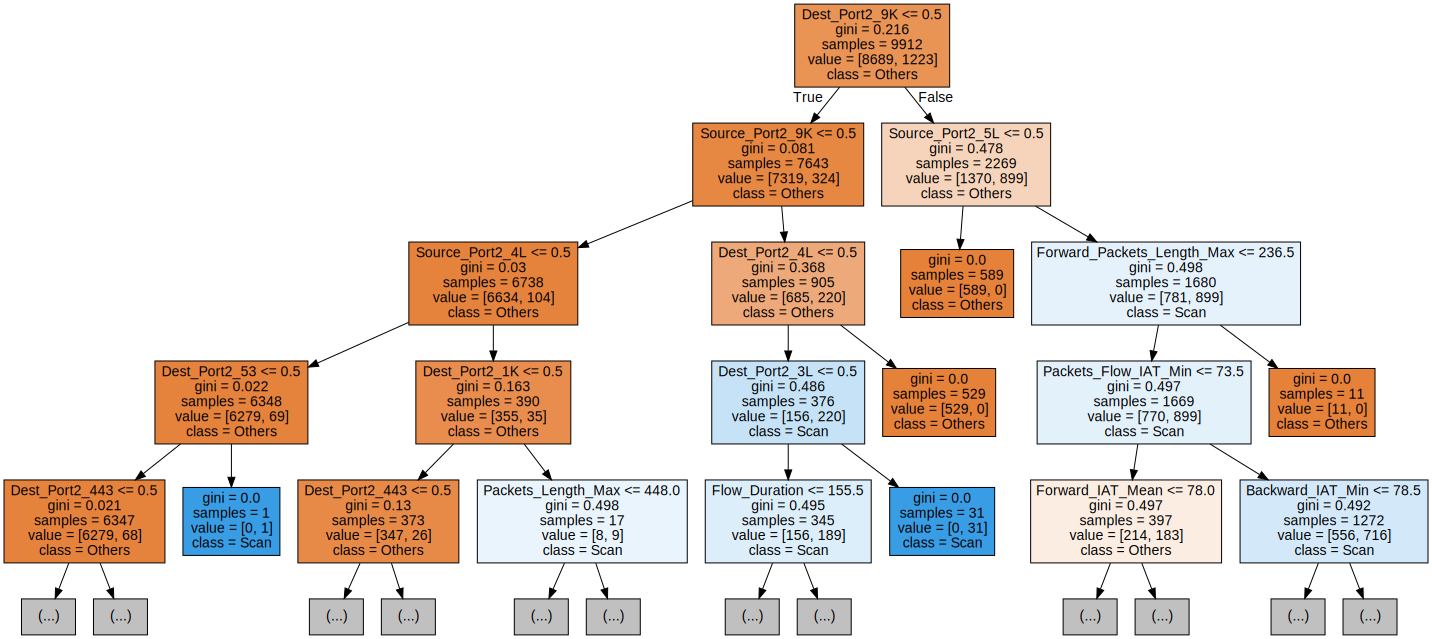

In [385]:
dtree.fit(X[chosen_features],y)
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=chosen_features,  
                                class_names=['Others',target_name],
                                filled=True)

scan['dt']['refitted_model'] = dtree
# Draw graph
scan['dt']['refitted_graph'] = graphviz.Source(dot_data, format="png") 
scan['dt']['refitted_graph']

## Attack - DoS

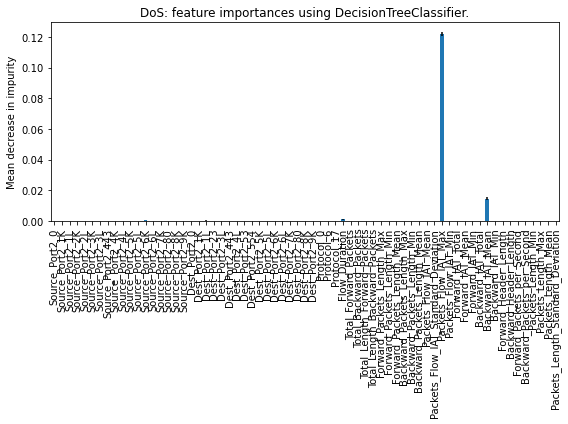

In [386]:
target_name = 'DoS'
X = ohe_X
y = one_hot_classes[target_name]

dos = {}
dos['target_name'] = target_name
dos['y'] = y


for name, algo in models.items():
    algo_name = str(algo.__class__).split('.')[-1][:-2]
    model, d_permutation_importance = model_and_feature_importances(algo, X, y,\
                                                          algo=algo_name,\
                                                          target_name=target_name)
    dos[name] = {'model': model,\
                   'permutation_importance': d_permutation_importance}

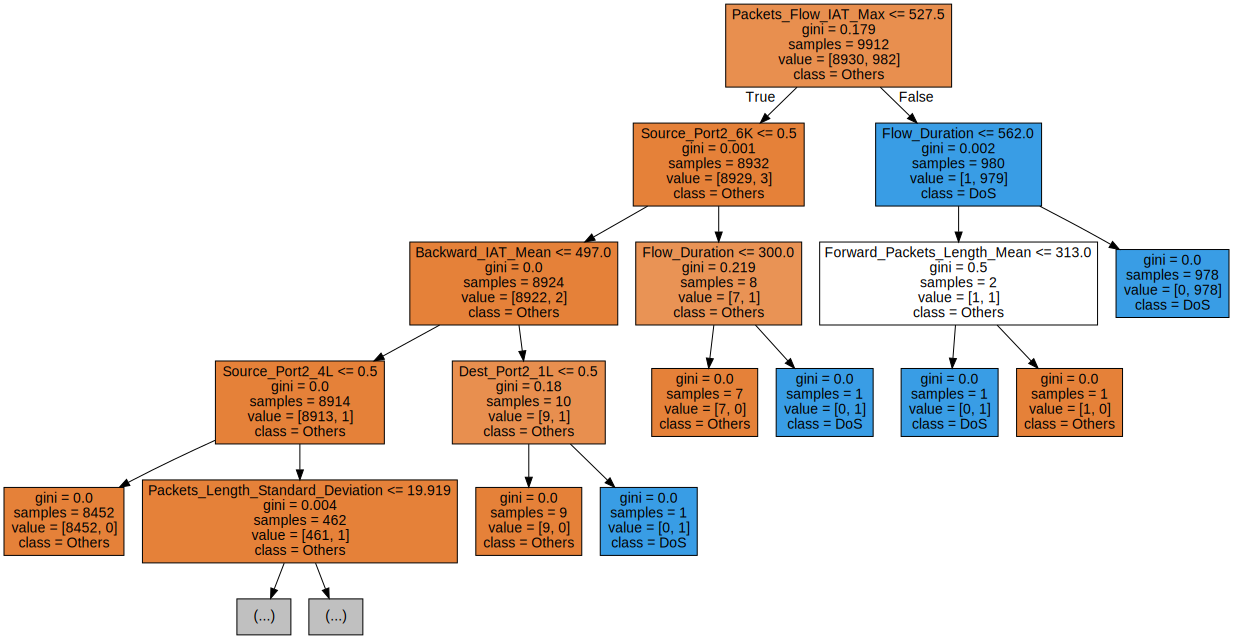

In [387]:
dtree = dos['dt']['model']
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=X.columns.tolist(),  
                                class_names=['Others',target_name],
                                filled=True)

# Draw graph
dos['dt']['graph'] = graphviz.Source(dot_data, format="png") 
dos['dt']['graph']

In [388]:
d_permutation_importance = dos['dt']['permutation_importance'] 
chosen_features = X.columns[d_permutation_importance['importances_mean'] > 0.0].tolist()
dos['dt']['chosen_features'] = chosen_features

In [389]:
chosen_features

['Source_Port2_6K',
 'Dest_Port2_1L',
 'Flow_Duration',
 'Forward_Packets_Length_Mean',
 'Packets_Flow_IAT_Max',
 'Backward_IAT_Mean']

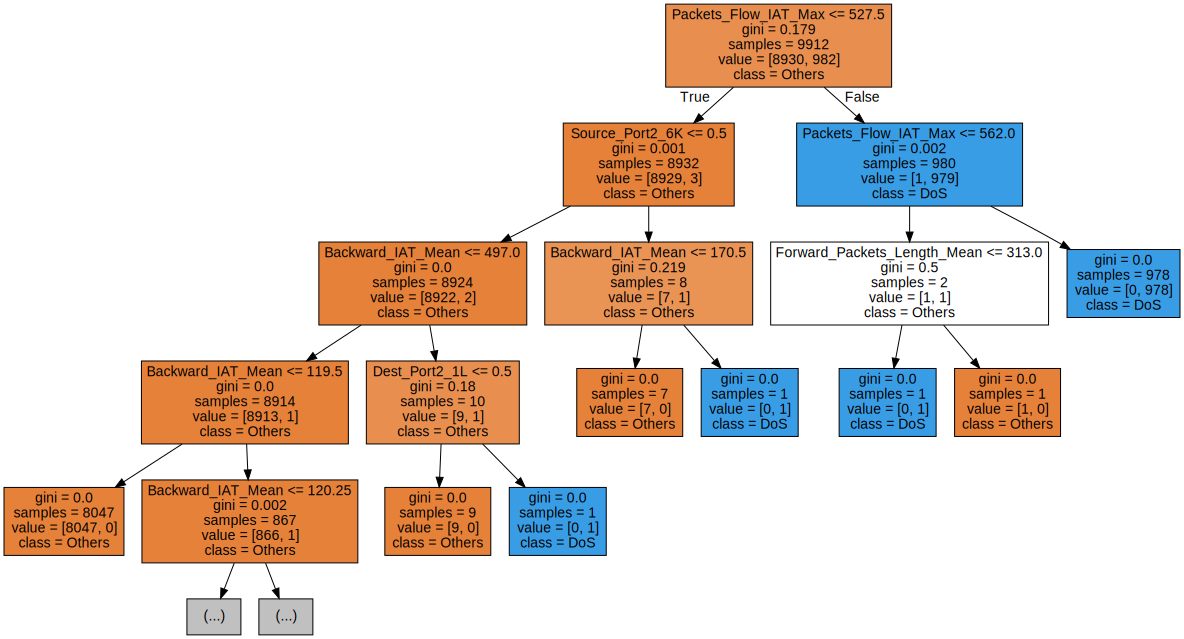

In [390]:
dtree.fit(X[chosen_features],y)
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=chosen_features,  
                                class_names=['Others',target_name],
                                filled=True)

dos['dt']['refitted_model'] = dtree
# Draw graph
dos['dt']['refitted_graph'] = graphviz.Source(dot_data, format="png") 
dos['dt']['refitted_graph']

## Normal traffic 

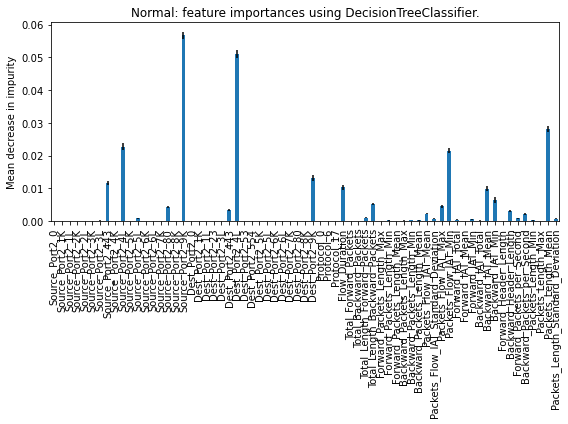

In [391]:
target_name = 'Normal'
X = ohe_X
y = one_hot_classes[target_name]

normal = {}
normal['target_name'] = target_name
normal['y'] = y


for name, algo in models.items():
    algo_name = str(algo.__class__).split('.')[-1][:-2]
    model, d_permutation_importance = model_and_feature_importances(algo, X, y,\
                                                          algo=algo_name,\
                                                          target_name=target_name)
    normal[name] = {'model': model,\
                   'permutation_importance': d_permutation_importance}

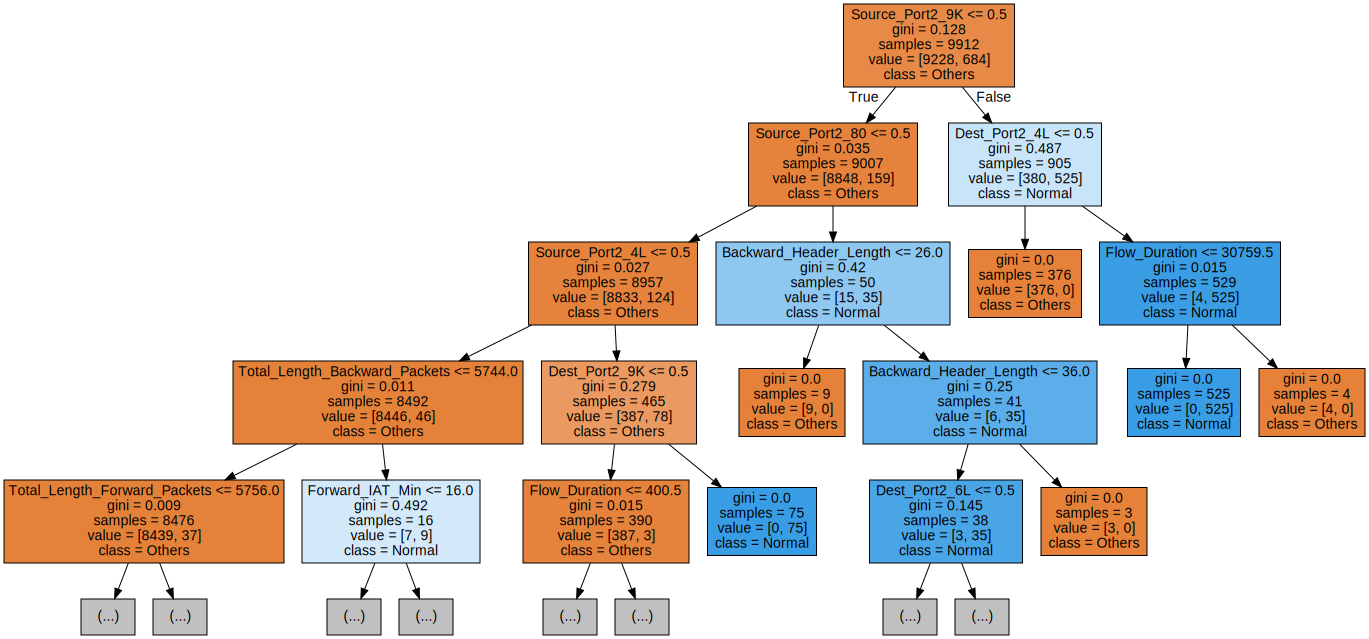

In [392]:
dtree = normal['dt']['model']
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=X.columns.tolist(),  
                                class_names=['Others',target_name],
                                filled=True)

# Draw graph
normal['dt']['graph'] = graphviz.Source(dot_data, format="png") 
normal['dt']['graph']

In [393]:
d_permutation_importance = normal['dt']['permutation_importance'] 
chosen_features = X.columns[d_permutation_importance['importances_mean'] > 0.0].tolist()
normal['dt']['chosen_features'] = chosen_features

In [394]:
chosen_features

['Source_Port2_3L',
 'Source_Port2_443',
 'Source_Port2_4L',
 'Source_Port2_5L',
 'Source_Port2_80',
 'Source_Port2_9K',
 'Dest_Port2_443',
 'Dest_Port2_4L',
 'Dest_Port2_9K',
 'Flow_Duration',
 'Total_Length_Forward_Packets',
 'Total_Length_Backward_Packets',
 'Forward_Packets_Length_Min',
 'Backward_Packets_Length_Max',
 'Backward_Packets_Length_Min',
 'Backward_Packets_Length_Mean',
 'Packets_Flow_IAT_Mean',
 'Packets_Flow_IAT_Standard_Deviation',
 'Packets_Flow_IAT_Max',
 'Packets_Flow_IAT_Min',
 'Forward_IAT_Total',
 'Forward_IAT_Mean',
 'Forward_IAT_Min',
 'Backward_IAT_Total',
 'Backward_IAT_Mean',
 'Backward_IAT_Min',
 'Backward_Header_Length',
 'Forward_Packets_per_Second',
 'Backward_Packets_per_Second',
 'Packets_Length_Min',
 'Packets_Length_Mean',
 'Packets_Length_Standard_Deviation']

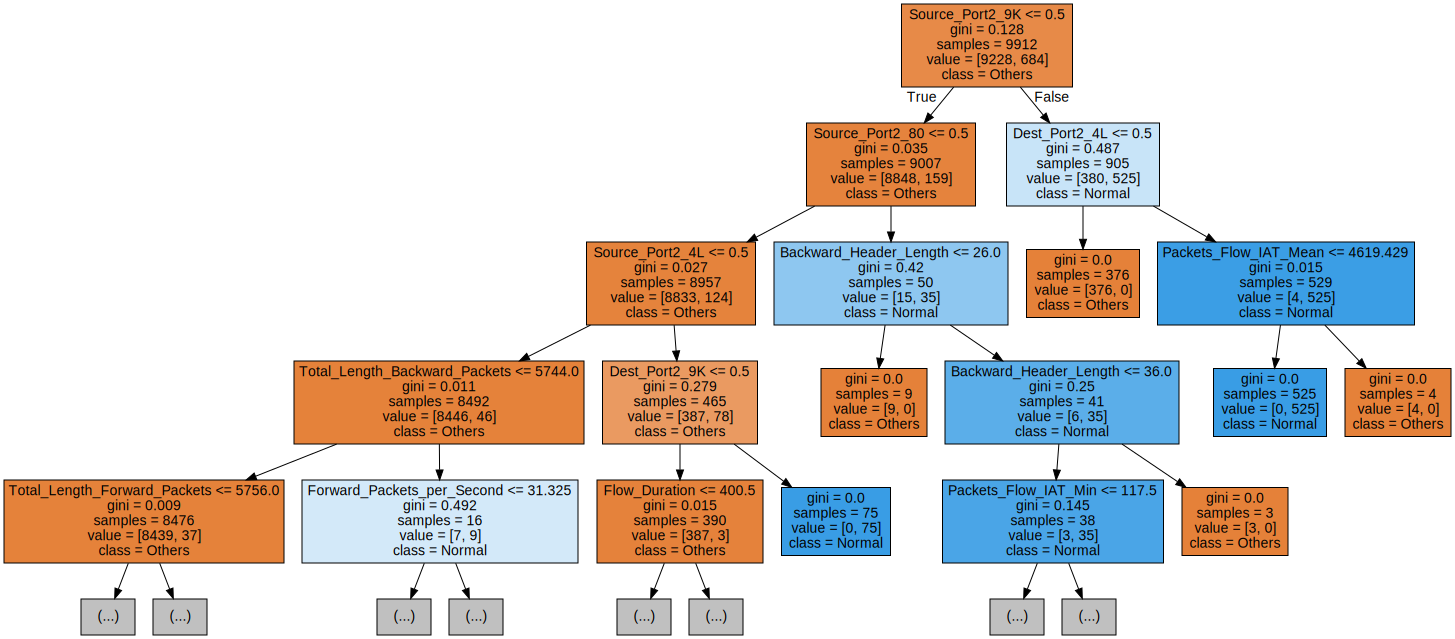

In [395]:
dtree.fit(X[chosen_features],normal['y'])
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=chosen_features,  
                                class_names=['Others',target_name],
                                filled=True)

normal['dt']['refitted_model'] = dtree
# Draw graph
normal['dt']['refitted_graph'] = graphviz.Source(dot_data, format="png") 
normal['dt']['refitted_graph']

## Spoofing

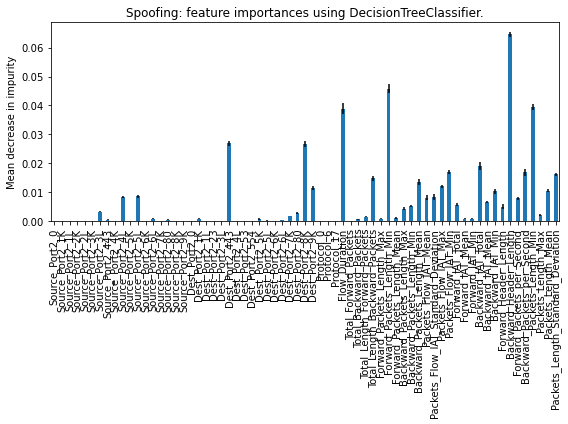

In [396]:
target_name = 'Spoofing'
X = ohe_X
y = one_hot_classes[target_name]

spoofing = {}
spoofing['target_name'] = target_name
spoofing['y'] = y


for name, algo in models.items():
    algo_name = str(algo.__class__).split('.')[-1][:-2]
    model, d_permutation_importance = model_and_feature_importances(algo, X, y,\
                                                          algo=algo_name,\
                                                          target_name=target_name)
    spoofing[name] = {'model': model,\
                   'permutation_importance': d_permutation_importance}

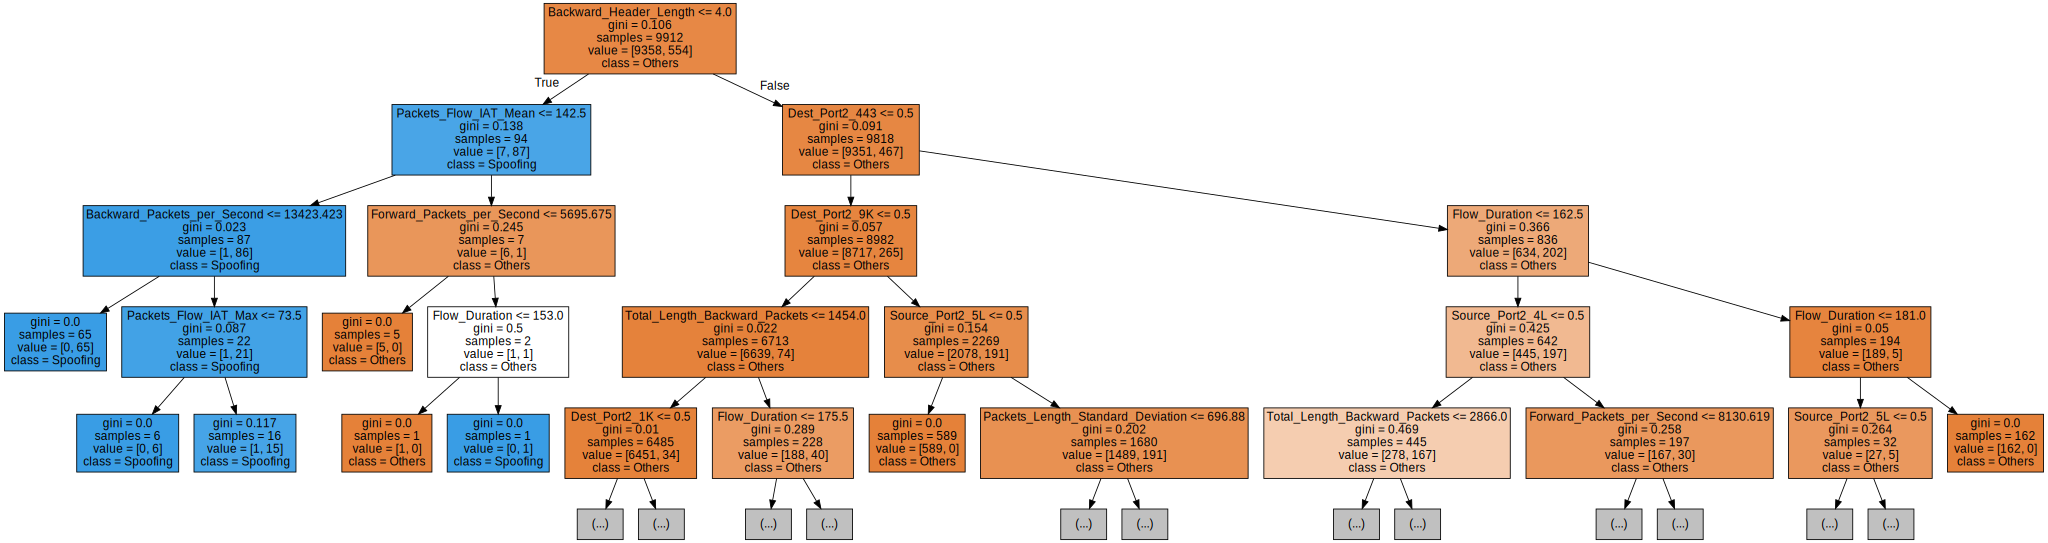

In [397]:
dtree = spoofing['dt']['model']
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=X.columns.tolist(),  
                                class_names=['Others',target_name],
                                filled=True)

# Draw graph
spoofing['dt']['graph'] = graphviz.Source(dot_data, format="png") 
spoofing['dt']['graph']

In [398]:
d_permutation_importance = spoofing['dt']['permutation_importance'] 
chosen_features = X.columns[d_permutation_importance['importances_mean'] > 0.0].tolist()
spoofing['dt']['chosen_features'] = chosen_features

In [399]:
chosen_features

['Source_Port2_3L',
 'Source_Port2_443',
 'Source_Port2_4L',
 'Source_Port2_5L',
 'Source_Port2_6L',
 'Source_Port2_80',
 'Dest_Port2_1K',
 'Dest_Port2_443',
 'Dest_Port2_5K',
 'Dest_Port2_5L',
 'Dest_Port2_6L',
 'Dest_Port2_7K',
 'Dest_Port2_80',
 'Dest_Port2_8K',
 'Dest_Port2_9K',
 'Flow_Duration',
 'Total_Backward_Packets',
 'Total_Length_Forward_Packets',
 'Total_Length_Backward_Packets',
 'Forward_Packets_Length_Max',
 'Forward_Packets_Length_Min',
 'Forward_Packets_Length_Mean',
 'Backward_Packets_Length_Max',
 'Backward_Packets_Length_Min',
 'Backward_Packets_Length_Mean',
 'Packets_Flow_IAT_Mean',
 'Packets_Flow_IAT_Standard_Deviation',
 'Packets_Flow_IAT_Max',
 'Packets_Flow_IAT_Min',
 'Forward_IAT_Total',
 'Forward_IAT_Mean',
 'Forward_IAT_Min',
 'Backward_IAT_Total',
 'Backward_IAT_Mean',
 'Backward_IAT_Min',
 'Forward_Header_Length',
 'Backward_Header_Length',
 'Forward_Packets_per_Second',
 'Backward_Packets_per_Second',
 'Packets_Length_Min',
 'Packets_Length_Max',
 'Pack

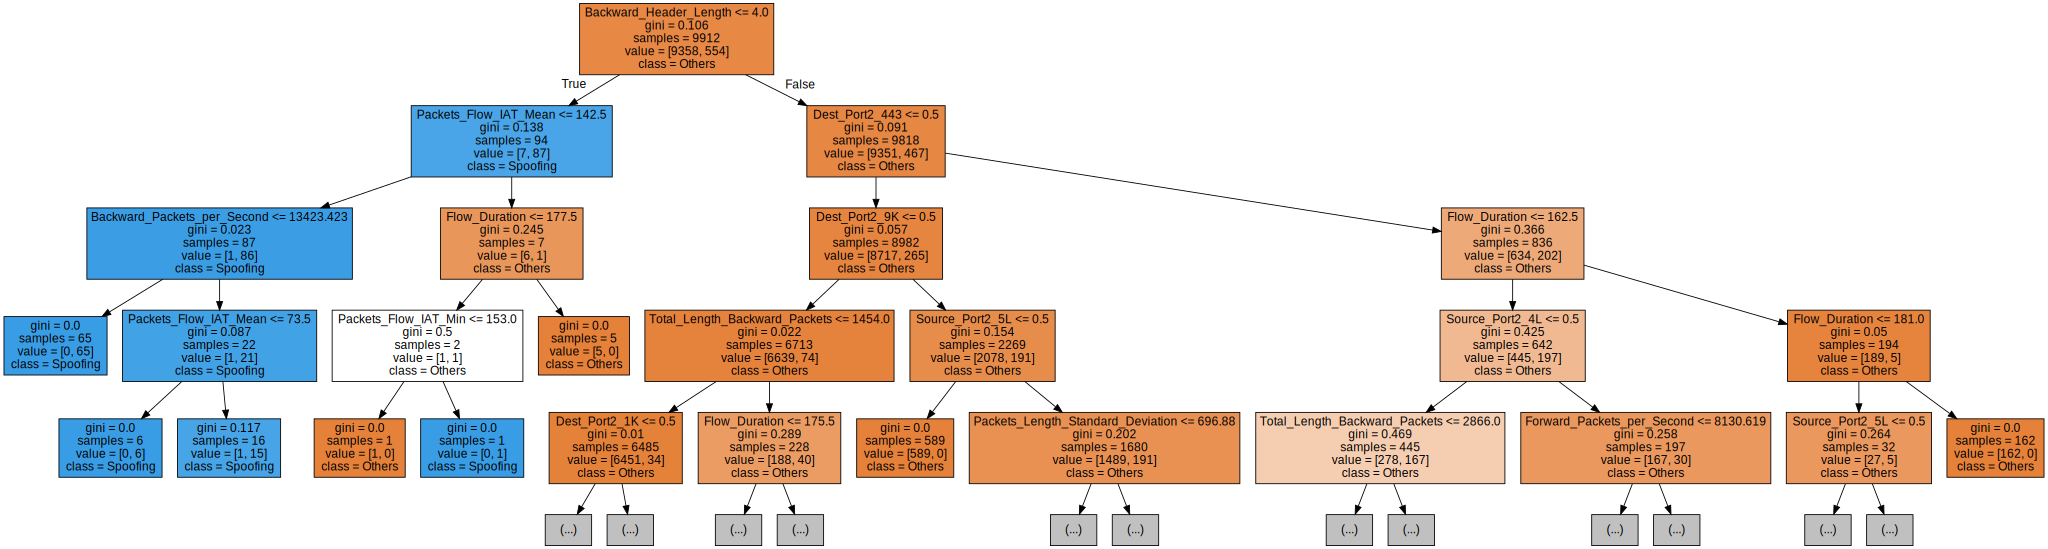

In [400]:
dtree.fit(X[chosen_features],y)
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=chosen_features,  
                                class_names=['Others',target_name],
                                filled=True)

spoofing['dt']['refitted_model'] = dtree
# Draw graph
spoofing['dt']['refitted_graph'] = graphviz.Source(dot_data, format="png") 
spoofing['dt']['refitted_graph']

## SHAP - Shapley values

In [138]:
explainer = shap.TreeExplainer(model=dtree,
                               data=None,
                               model_output='raw',
                               feature_perturbation='tree_path_dependent')

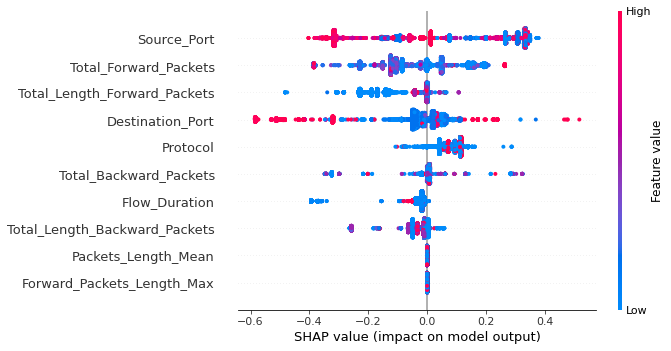

In [139]:
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values[1], features=X, max_display=10)

In [142]:

X1, y1 = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

In [158]:
explainer = shap.TreeExplainer(dtree)
expected_value = explainer.expected_value
expected_value

array([0.34735674, 0.65264326])

In [162]:
import warnings
explainer = shap.TreeExplainer(dtree)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(20)
features = X.iloc[select]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

Explainer expected value: [0.34735674 0.65264326]


In [161]:
shap.decision_plot(expected_value, shap_values, features)

ValueError: operands could not be broadcast together with shapes (2,) (33,21) 

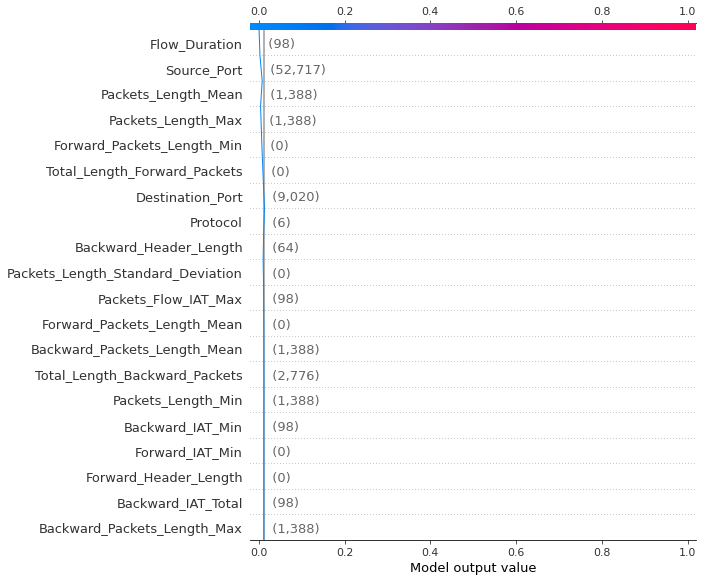

In [152]:
shap.decision_plot(expected_value, shap_values, features, link='logit')

In [153]:
expected_value

array([-4.39962689])

# References

1. [Understanding Shapley value explanation algorithms for trees](https://hughchen.github.io/its_blog/index.html)
2. [SHAP Part 3: Tree SHAP](https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b)